In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("Econometrics.csv")
data = data.dropna()
print(data.shape)
print(list(data.columns))

(50, 6)
['Dependent Variable Y', 'Variable X1', 'Variable X2', 'Variable X3', 'Variable X4', 'Variable X5']


In [3]:
data.head()

,Dependent Variable Y,Variable X1,Variable X2,Variable X3,Variable X4,Variable X5
0,521,18308,185,4.041,79.6,7.2
1,367,1148,600,0.550,1.0,8.5
2,443,18068,372,3.665,32.3,5.7
3,365,7729,142,2.351,45.1,7.3
4,614,100484,432,29.760,190.8,7.5


# LIN-LIN Model

## With Intercept

In [4]:
Y = data[['Dependent Variable Y']]
X = data[['Variable X1', 'Variable X2', 'Variable X3', 'Variable X4', 'Variable X5']]

X1 = sm.add_constant(X)
model1 = sm.OLS(Y,X1)
result1 = model1.fit()
print(result1.summary())

                             OLS Regression Results                             
Dep. Variable:     Dependent Variable Y   R-squared:                       0.327
Model:                              OLS   Adj. R-squared:                  0.251
Method:                   Least Squares   F-statistic:                     4.280
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):            0.00294
Time:                          02:05:56   Log-Likelihood:                -318.17
No. Observations:                    50   AIC:                             648.3
Df Residuals:                        44   BIC:                             659.8
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          57.9555    108.

In [5]:
pvalue = pd.DataFrame(result1.pvalues,columns={'p_value'},)
pvs1=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs1.append(pvalue.index[i])

Y = data[['Dependent Variable Y']]
X = data[pvs1]

X1 = sm.add_constant(X)
model1 = sm.OLS(Y,X1)
result1 = model1.fit()
r2_1 = result1.rsquared_adj
f_1 = result1.f_test
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent Variable Y   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):                nan
Time:                          02:05:56   Log-Likelihood:                -328.08
No. Observations:                    50   AIC:                             658.2
Df Residuals:                        49   BIC:                             660.1
Df Model:                             0                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.9200     24.454     13.573      0.000     282.778     381.062
==============================================================================
Omnibus:                        2.133   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.344   Jarque-Bera (JB):                1.921
Skew:                           0.469   Prob(JB):                        0.383
Kurtosis:                       2.796   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Without Intercept

In [6]:
Y = data[['Dependent Variable Y']]
X = data[['Variable X1', 'Variable X2', 'Variable X3', 'Variable X4', 'Variable X5']]

model2 = sm.OLS(Y,X)
result2 = model2.fit()
print(result2.summary2())

                         Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared (uncentered): 0.842   
Dependent Variable:     Dependent Variable Y AIC:                         646.6683
Date:                   2023-03-12 02:05     BIC:                         656.2284
No. Observations:       50                   Log-Likelihood:              -318.33 
Df Model:               5                    F-statistic:                 54.27   
Df Residuals:           45                   Prob (F-statistic):          6.14e-18
R-squared (uncentered): 0.858                Scale:                       22045.  
--------------------------------------------------------------------------------------
                    Coef.      Std.Err.        t        P>|t|       [0.025      0.975]
--------------------------------------------------------------------------------------
Variable X1        -0.0034       0.0035     -0.9759     0.3343     -0.0104      0.0036
Variable X2   

In [7]:
pvalue = pd.DataFrame(result2.pvalues,columns={'p_value'},)
pvs2=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs2.append(pvalue.index[i])

Y = data[['Dependent Variable Y']]
X = data[pvs2]

model2 = sm.OLS(Y,X)
result2 = model2.fit()
r2_2 = result2.rsquared_adj
f_2 = result2.f_test
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.824   
Dependent Variable:     Dependent Variable Y AIC:                         649.2213
Date:                   2023-03-12 02:05     BIC:                         653.0453
No. Observations:       50                   Log-Likelihood:              -322.61 
Df Model:               2                    F-statistic:                 118.2   
Df Residuals:           48                   Prob (F-statistic):          2.86e-19
R-squared (uncentered): 0.831                Scale:                       24523.  
---------------------------------------------------------------------------------------
                  Coef.       Std.Err.        t         P>|t|       [0.025       0.975]
---------------------------------------------------------------------------------------
Variable X2       0.6901        0.2113      3.2663      0.0020      0.2653       1.1149
Variable X5      23.7225        8.9633      2.6466      0.0110      5.7004      41.7445
----------------------------------------------------------------------------------
Omnibus:                     3.751             Durbin-Watson:                2.117
Prob(Omnibus):               0.153             Jarque-Bera (JB):             2.899
Skew:                        0.577             Prob(JB):                     0.235
Kurtosis:                    3.247             Condition No.:                112  
==================================================================================

"""

# LIN-LOG Model

In [8]:
data['Log Variable X1'] = np.log(data['Variable X1'])
data['Log Variable X2'] = np.log(data['Variable X2'])
data['Log Variable X3'] = np.log(data['Variable X3'])
data['Log Variable X4'] = np.log(data['Variable X4'])
data['Log Variable X5'] = np.log(data['Variable X5'])

## With Intercept

In [9]:
Y = data[['Dependent Variable Y']]
X = data[['Log Variable X1', 'Log Variable X2', 'Log Variable X3', 'Log Variable X4', 'Log Variable X5']]

X1 = sm.add_constant(X)
model3 = sm.OLS(Y,X1)
result3 = model3.fit()
print(result3.summary())

                             OLS Regression Results                             
Dep. Variable:     Dependent Variable Y   R-squared:                       0.442
Model:                              OLS   Adj. R-squared:                  0.379
Method:                   Least Squares   F-statistic:                     6.973
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):           7.14e-05
Time:                          02:05:56   Log-Likelihood:                -313.49
No. Observations:                    50   AIC:                             639.0
Df Residuals:                        44   BIC:                             650.5
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              98.

In [10]:
pvalue = pd.DataFrame(result3.pvalues,columns={'p_value'},)
pvs3=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs3.append(pvalue.index[i])
        
Y = data[['Dependent Variable Y']]
X = data[pvs3]

X1 = sm.add_constant(X)
model3 = sm.OLS(Y,X1)
result3 = model3.fit()
r2_3 = result3.rsquared_adj
f_3 = result3.f_test
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent Variable Y   R-squared:                       0.398
Model:                              OLS   Adj. R-squared:                  0.372
Method:                   Least Squares   F-statistic:                     15.52
Date:                  Sun, 12 Mar 2023   Prob (F-statistic):           6.69e-06
Time:                          02:05:56   Log-Likelihood:                -315.41
No. Observations:                    50   AIC:                             636.8
Df Residuals:                        47   BIC:                             642.5
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -670.1793    326.321     -2.054      0.046   -1326.652     -13.707
Log Variable X2   165.5474     59.921      2.763      0.008      45.003     286.092
Log Variable X3    80.2806     19.776      4.060      0.000      40.497     120.065
==============================================================================
Omnibus:                        9.177   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                8.729
Skew:                           0.814   Prob(JB):                       0.0127
Kurtosis:                       4.240   Cond. No.                         98.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Without Intercept

In [11]:
Y = data[['Dependent Variable Y']]
X = data[['Log Variable X1', 'Log Variable X2', 'Log Variable X3', 'Log Variable X4', 'Log Variable X5']]

model4 = sm.OLS(Y,X)
result4 = model4.fit()
print(result4.summary2())

                         Results: Ordinary least squares
Model:                  OLS                  Adj. R-squared (uncentered): 0.870   
Dependent Variable:     Dependent Variable Y AIC:                         637.0004
Date:                   2023-03-12 02:05     BIC:                         646.5605
No. Observations:       50                   Log-Likelihood:              -313.50 
Df Model:               5                    F-statistic:                 67.76   
Df Residuals:           45                   Prob (F-statistic):          8.26e-20
R-squared (uncentered): 0.883                Scale:                       18169.  
-------------------------------------------------------------------------------------
                    Coef.      Std.Err.       t       P>|t|       [0.025      0.975] 
-------------------------------------------------------------------------------------
Log Variable X1    -83.1652     31.6630    -2.6266    0.0117    -146.9377    -19.3926
Log Variable X2   

In [12]:
pvalue = pd.DataFrame(result4.pvalues,columns={'p_value'},)
pvs4=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs4.append(pvalue.index[i])
        
Y = data[['Dependent Variable Y']]
X = data[pvs4]

model4 = sm.OLS(Y,X)
result4 = model4.fit()
r2_4 = result4.rsquared_adj
f_4 = result4.f_test
result4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                  OLS                  Adj. R-squared (uncentered): 0.871   
Dependent Variable:     Dependent Variable Y AIC:                         634.6225
Date:                   2023-03-12 02:05     BIC:                         640.3586
No. Observations:       50                   Log-Likelihood:              -314.31 
Df Model:               3                    F-statistic:                 113.7   
Df Residuals:           47                   Prob (F-statistic):          1.49e-21
R-squared (uncentered): 0.879                Scale:                       17970.  
-------------------------------------------------------------------------------------
                    Coef.      Std.Err.       t       P>|t|       [0.025      0.975] 
-------------------------------------------------------------------------------------
Log Variable X1    -74.1978     29.0755    -2.5519    0.0140    -132.6903    -15.7054
Log Variable X2    157.3280     45.1133     3.4874    0.0011      66.5717    248.0843
Log Variable X3    152.8775     32.0604     4.7684    0.0000      88.3802    217.3747
----------------------------------------------------------------------------------
Omnibus:                     8.504             Durbin-Watson:                1.989
Prob(Omnibus):               0.014             Jarque-Bera (JB):             7.793
Skew:                        0.789             Prob(JB):                     0.020
Kurtosis:                    4.118             Condition No.:                35   
==================================================================================

"""

# LOG-LIN Model

In [13]:
data['Log Dependent Variable Y'] = np.log(data['Dependent Variable Y'])

## With Intercept

In [14]:
Y = data[['Log Dependent Variable Y']]
X = data[['Variable X1', 'Variable X2', 'Variable X3', 'Variable X4', 'Variable X5']]

X1 = sm.add_constant(X)
model5 = sm.OLS(Y,X1)
result5 = model5.fit()
print(result5.summary())

                               OLS Regression Results                               
Dep. Variable:     Log Dependent Variable Y   R-squared:                       0.299
Model:                                  OLS   Adj. R-squared:                  0.220
Method:                       Least Squares   F-statistic:                     3.762
Date:                      Sun, 12 Mar 2023   Prob (F-statistic):            0.00637
Time:                              02:05:57   Log-Likelihood:                -38.688
No. Observations:                        50   AIC:                             89.38
Df Residuals:                            44   BIC:                             100.8
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [15]:
pvalue = pd.DataFrame(result5.pvalues,columns={'p_value'},)
pvs5=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs5.append(pvalue.index[i])
        
pvs5.remove('const')

Y = data[['Log Dependent Variable Y']]
X = data[pvs5]

X1 = sm.add_constant(X)
model5 = sm.OLS(Y,X1)
result5 = model5.fit()
r2_5 = result5.rsquared_adj
f_5 = result5.f_test
result5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Log Dependent Variable Y   R-squared:                       0.182
Model:                                  OLS   Adj. R-squared:                  0.165
Method:                       Least Squares   F-statistic:                     10.71
Date:                      Sun, 12 Mar 2023   Prob (F-statistic):            0.00198
Time:                              02:05:57   Log-Likelihood:                -42.552
No. Observations:                        50   AIC:                             89.10
Df Residuals:                            48   BIC:                             92.93
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8849      0.245     19.962      0.000       4.393       5.377
Variable X2     0.0029      0.001      3.272      0.002       0.001       0.005
==============================================================================
Omnibus:                        2.563   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.318
Skew:                          -0.518   Prob(JB):                        0.314
Kurtosis:                       2.800   Cond. No.                         831.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Withot Intercept

In [16]:
Y = data[['Log Dependent Variable Y']]
X = data[['Variable X1', 'Variable X2', 'Variable X3', 'Variable X4', 'Variable X5']]

model6 = sm.OLS(Y,X)
result6 = model6.fit()
print(result6.summary2())

                           Results: Ordinary least squares
Model:                  OLS                      Adj. R-squared (uncentered): 0.962   
Dependent Variable:     Log Dependent Variable Y AIC:                         156.8506
Date:                   2023-03-12 02:05         BIC:                         166.4108
No. Observations:       50                       Log-Likelihood:              -73.425 
Df Model:               5                        F-statistic:                 253.4   
Df Residuals:           45                       Prob (F-statistic):          9.14e-32
R-squared (uncentered): 0.966                    Scale:                       1.2269  
-------------------------------------------------------------------------------------------
                     Coef.       Std.Err.         t         P>|t|        [0.025      0.975]
-------------------------------------------------------------------------------------------
Variable X1          0.0000        0.0000       0.2003  

In [17]:
pvalue = pd.DataFrame(result6.pvalues,columns={'p_value'},)
pvs6=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs6.append(pvalue.index[i])
        
Y = data[['Log Dependent Variable Y']]
X = data[pvs6]

model6 = sm.OLS(Y,X)
result6 = model6.fit()
r2_6 = result6.rsquared_adj
f_6 = result6.f_test
result6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                  OLS                      Adj. R-squared (uncentered): 0.963   
Dependent Variable:     Log Dependent Variable Y AIC:                         152.9772
Date:                   2023-03-12 02:05         BIC:                         156.8012
No. Observations:       50                       Log-Likelihood:              -74.489 
Df Model:               2                        F-statistic:                 646.7   
Df Residuals:           48                       Prob (F-statistic):          1.95e-35
R-squared (uncentered): 0.964                    Scale:                       1.2002  
--------------------------------------------------------------------------------------------
                   Coef.        Std.Err.         t          P>|t|        [0.025       0.975]
--------------------------------------------------------------------------------------------
Variable X2        0.0075         0.0015       5.0718       0.0000       0.0045       0.0105
Variable X5        0.5483         0.0627       8.7436       0.0000       0.4222       0.6744
--------------------------------------------------------------------------------------
Omnibus:                      6.914               Durbin-Watson:                 2.018
Prob(Omnibus):                0.032               Jarque-Bera (JB):              5.968
Skew:                         -0.675              Prob(JB):                      0.051
Kurtosis:                     4.022               Condition No.:                 112  
======================================================================================

"""

# LOG-LOG Model

## With Intercept

In [18]:
Y = data[['Log Dependent Variable Y']]
X = data[['Log Variable X1', 'Log Variable X2', 'Log Variable X3', 'Log Variable X4', 'Log Variable X5']]

X1 = sm.add_constant(X)
model7 = sm.OLS(Y,X1)
result7 = model7.fit()
print(result7.summary())

                               OLS Regression Results                               
Dep. Variable:     Log Dependent Variable Y   R-squared:                       0.495
Model:                                  OLS   Adj. R-squared:                  0.437
Method:                       Least Squares   F-statistic:                     8.611
Date:                      Sun, 12 Mar 2023   Prob (F-statistic):           9.47e-06
Time:                              02:05:57   Log-Likelihood:                -30.526
No. Observations:                        50   AIC:                             73.05
Df Residuals:                            44   BIC:                             84.52
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

In [19]:
pvalue = pd.DataFrame(result7.pvalues,columns={'p_value'},)
pvs7=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs7.append(pvalue.index[i])
        
Y = data[['Log Dependent Variable Y']]
X = data[pvs7]

X1 = sm.add_constant(X)
model7 = sm.OLS(Y,X1)
result7 = model7.fit()
r2_7 = result7.rsquared_adj
f_7 = result7.f_test
result7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Log Dependent Variable Y   R-squared:                       0.446
Model:                                  OLS   Adj. R-squared:                  0.423
Method:                       Least Squares   F-statistic:                     18.93
Date:                      Sun, 12 Mar 2023   Prob (F-statistic):           9.31e-07
Time:                              02:05:57   Log-Likelihood:                -32.812
No. Observations:                        50   AIC:                             71.62
Df Residuals:                            47   BIC:                             77.36
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.5551      1.146      1.357      0.181      -0.750       3.860
Log Variable X2     0.6800      0.210      3.233      0.002       0.257       1.103
Log Variable X3     0.3012      0.069      4.338      0.000       0.161       0.441
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.479
Skew:                          -0.211   Prob(JB):                        0.787
Kurtosis:                       2.773   Cond. No.                         98.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Without Intercept

In [20]:
Y = data[['Log Dependent Variable Y']]
X = data[['Log Variable X1', 'Log Variable X2', 'Log Variable X3', 'Log Variable X4', 'Log Variable X5']]

model8 = sm.OLS(Y,X)
result8 = model8.fit()
print(result8.summary2())

                           Results: Ordinary least squares
Model:                  OLS                      Adj. R-squared (uncentered): 0.993   
Dependent Variable:     Log Dependent Variable Y AIC:                         75.1084 
Date:                   2023-03-12 02:05         BIC:                         84.6685 
No. Observations:       50                       Log-Likelihood:              -32.554 
Df Model:               5                        F-statistic:                 1337.   
Df Residuals:           45                       Prob (F-statistic):          1.01e-47
R-squared (uncentered): 0.993                    Scale:                       0.23923 
------------------------------------------------------------------------------------------
                         Coef.      Std.Err.        t        P>|t|       [0.025     0.975]
------------------------------------------------------------------------------------------
Log Variable X1          0.0257       0.1149      0.2235   

In [21]:
pvalue = pd.DataFrame(result8.pvalues,columns={'p_value'},)
pvs8=[]
for i in range (0, len(pvalue["p_value"])):
    if pvalue["p_value"][i] < 0.05:
        pvs8.append(pvalue.index[i])
        
Y = data[['Log Dependent Variable Y']]
X = data[pvs8]

model8 = sm.OLS(Y,X)
result8 = model8.fit()
r2_8 = result8.rsquared_adj
f_8 = result8.f_test
result8.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
======================================================================================
Model:                  OLS                      Adj. R-squared (uncentered): 0.993   
Dependent Variable:     Log Dependent Variable Y AIC:                         71.5460 
Date:                   2023-03-12 02:05         BIC:                         75.3701 
No. Observations:       50                       Log-Likelihood:              -33.773 
Df Model:               2                        F-statistic:                 3394.   
Df Residuals:           48                       Prob (F-statistic):          2.06e-52
R-squared (uncentered): 0.993                    Scale:                       0.23548 
-------------------------------------------------------------------------------------------
                      Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
-------------------------------------------------------------------------------------------
Log Variable X2       0.9645        0.0188      51.2133      0.0000      0.9266      1.0023
Log Variable X3       0.2853        0.0690       4.1327      0.0001      0.1465      0.4241
--------------------------------------------------------------------------------------
Omnibus:                      0.088               Durbin-Watson:                 2.168
Prob(Omnibus):                0.957               Jarque-Bera (JB):              0.260
Skew:                         -0.073              Prob(JB):                      0.878
Kurtosis:                     2.678               Condition No.:                 6    
======================================================================================

"""

# Comparing Between the Models

In [22]:
models = ['Lin-Lin With Intercept','Lin-Lin Without Intercept','Lin-Log With Intercept',
          'Lin-Log Without Intercept', 'Log-Lin With Intercept', 'Log-Lin Without Intercept',
          'Log-Logn With Intercept', 'Log-Log Without Intercept']
adj_rsquared = [r2_1, r2_2, r2_3, r2_4, r2_5, r2_6, r2_7, r2_8]
pvalues = [pvs1, pvs2, pvs3, pvs4, pvs5, pvs6, pvs7, pvs8]
compare_models = pd.DataFrame({ "Models": models, "Adj. R-squared": adj_rsquared , "Number of Features": pvalues})
compare_models.sort_values(by = "Adj. R-squared", ascending = False)

,Models,Adj. R-squared,Number of Features
7,Log-Log Without Intercept,9.926863e-01,"[Log Variable X2, Log Variable X3]"
5,Log-Lin Without Intercept,9.627230e-01,"[Variable X2, Variable X5]"
3,Lin-Log Without Intercept,8.711584e-01,"[Log Variable X1, Log Variable X2, Log Variabl..."
1,Lin-Lin Without Intercept,8.241722e-01,"[Variable X2, Variable X5]"
6,Log-Logn With Intercept,4.226271e-01,"[Log Variable X2, Log Variable X3]"
2,Lin-Log With Intercept,3.720653e-01,"[Log Variable X2, Log Variable X3]"
4,Log-Lin With Intercept,1.653222e-01,[Variable X2]
0,Lin-Lin With Intercept,1.110223e-16,[]


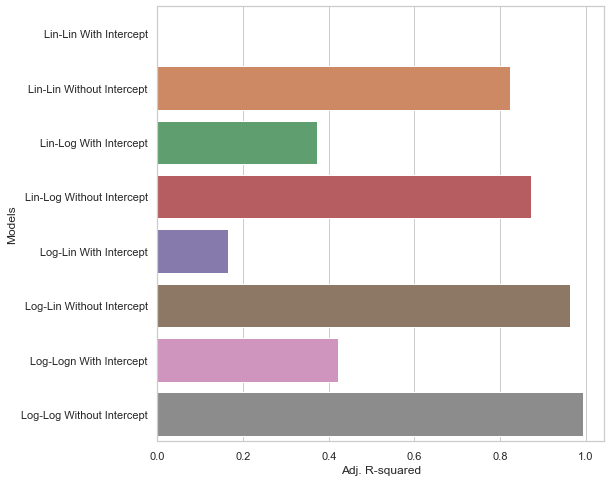

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
sns.barplot(x = "Adj. R-squared", y = "Models", data = compare_models)
plt.show()

In [24]:
Y = data[['Log Dependent Variable Y']]
X = data[['Log Variable X2', 'Log Variable X3']]

model8 = sm.OLS(Y,X)
result8 = model8.fit()
r2_8 = result8.rsquared_adj
f_8 = result8.f_test
print(result8.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Log Dependent Variable Y   R-squared (uncentered):                   0.993
Model:                                  OLS   Adj. R-squared (uncentered):              0.993
Method:                       Least Squares   F-statistic:                              3394.
Date:                      Sun, 12 Mar 2023   Prob (F-statistic):                    2.06e-52
Time:                              02:05:57   Log-Likelihood:                         -33.773
No. Observations:                        50   AIC:                                      71.55
Df Residuals:                            48   BIC:                                      75.37
Df Model:                                 2                                                  
Covariance Type:                  nonrobust                                                  
                      coef    std err          t      P>|t| 

In [25]:
logreg = LinearRegression(fit_intercept=False)
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
df = data.copy()
df = df[['Log Dependent Variable Y']]
df.rename(columns={"Log Dependent Variable Y": "Actual (Log Y)"},inplace=True)
df['Forecast (F)']=Y_pred
df['Error (E)']= df['Actual (Log Y)'] - df['Forecast (F)']
df.head()

,Actual (Log Y),Forecast (F),Error (E)
0,6.255750,5.433284,0.822466
1,5.905362,5.999038,-0.093676
2,6.093570,6.079134,0.014436
3,5.899897,5.023615,0.876282
4,6.419995,6.820895,-0.400900


In [26]:
df.tail()

,Actual (Log Y),Forecast (F),Error (E)
45,5.236442,5.883048,-0.646606
46,5.713733,5.818283,-0.104550
47,4.624973,4.767746,-0.142773
48,4.844187,5.845271,-1.001084
49,5.525453,5.275793,0.249660


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


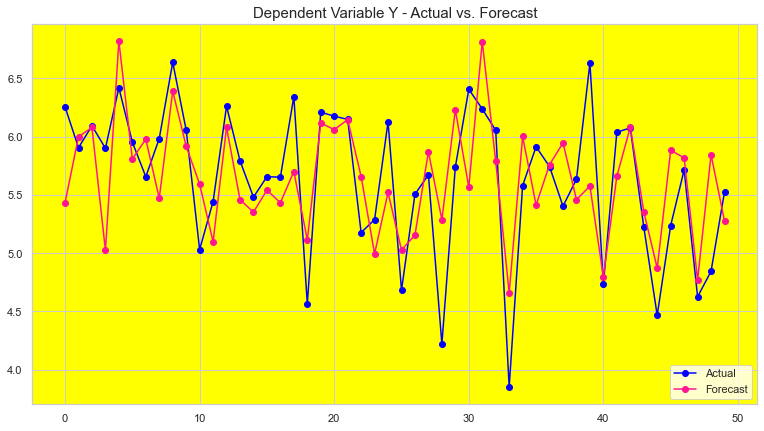

In [27]:
import matplotlib.pyplot as plt
import numpy as np
fontsize=15
plt.figure(figsize=(13,7))
plt.title("Dependent Variable Y - Actual vs. Forecast",fontsize=fontsize)
ax = plt.axes()
ax.set_facecolor("yellow")
Actual = np.array(df['Actual (Log Y)'])
Forecast = np.array(df['Forecast (F)'])
plt.plot(Actual, marker = 'o', color="blue", label="Actual")
plt.plot(Forecast,marker = 'o', color="deeppink", label="Forecast")
plt.legend(loc="lower right")
plt.show()